## Gradient Boosting for Prediction and Inference

### Lesson 3
In this lesson we will begin to introduce and discuss some of the more recent gradient boosting packages: XGBoost, CatBoost, LightGBM, StructureBoost.  Each has advanced the theory and usability of Gradient Boosting to allow it to tackle different practical situations.

We will also work with new data sets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.__version__

pd.options.display.max_columns = 999

## Ames Housing Data

We'll start by using the Ames housing data.

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df_house = pd.read_csv('data/Ames_Housing_Data.tsv', delimiter='\t')
df_house = df_house.loc[df_house['Gr Liv Area']<=4000,:]
df_house['Garage Area'].fillna(0, inplace=True)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style   

In [4]:
df_house.sample(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1532,1533,909276170,70,RL,74.0,11988,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,6,7,1934,1995,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,326.0,Unf,0.0,389.0,715.0,GasA,Fa,Y,FuseA,849,811,0,1660,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Detchd,1939.0,Unf,1.0,240.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,188700
2699,2700,904100090,90,RL,120.0,11136,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Feedr,Duplex,1Story,6,5,1964,1964,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1921.0,1921.0,GasA,TA,Y,SBrkr,1921,0,0,1921,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Detchd,1964.0,Unf,2.0,576.0,TA,TA,Y,0,180,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,150000
443,444,528142090,20,RL,107.0,11362,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,Stone,42.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1039.0,Unf,0.0,797.0,1836.0,GasA,Ex,Y,SBrkr,1836,0,0,1836,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,3.0,862.0,TA,TA,Y,125,185,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,280000
2924,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2364,2365,527450010,160,RM,24.0,2760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,514.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,525.0,525.0,GasA,TA,Y,SBrkr,525,567,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1973.0,Unf,2.0,440.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,105500


In [5]:
df_house.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
feat_1 = ['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
        'Full Bath', 'Half Bath', 'Bedroom AbvGr',
         'Garage Area', 'Fireplaces']


In [7]:
X = df_house.iloc[:,:-1]  # everything except Sale Price
y = df_house.SalePrice 

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size = 400, random_state=0)

In [9]:
X.loc[:,feat_1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Half Bath       2925 non-null   int64  
 8   Bedroom AbvGr   2925 non-null   int64  
 9   Garage Area     2925 non-null   float64
 10  Fireplaces      2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


### Brief Data Exploration
It is a good habit to look at the data before modeling.  For regression the `pairplot` in the seaborn package is a nice way to look at all of the bivariate relationships.  You should also understand distribution of the target variable (and know its mean).

In [10]:
np.mean(df_house.SalePrice)

180411.5747008547

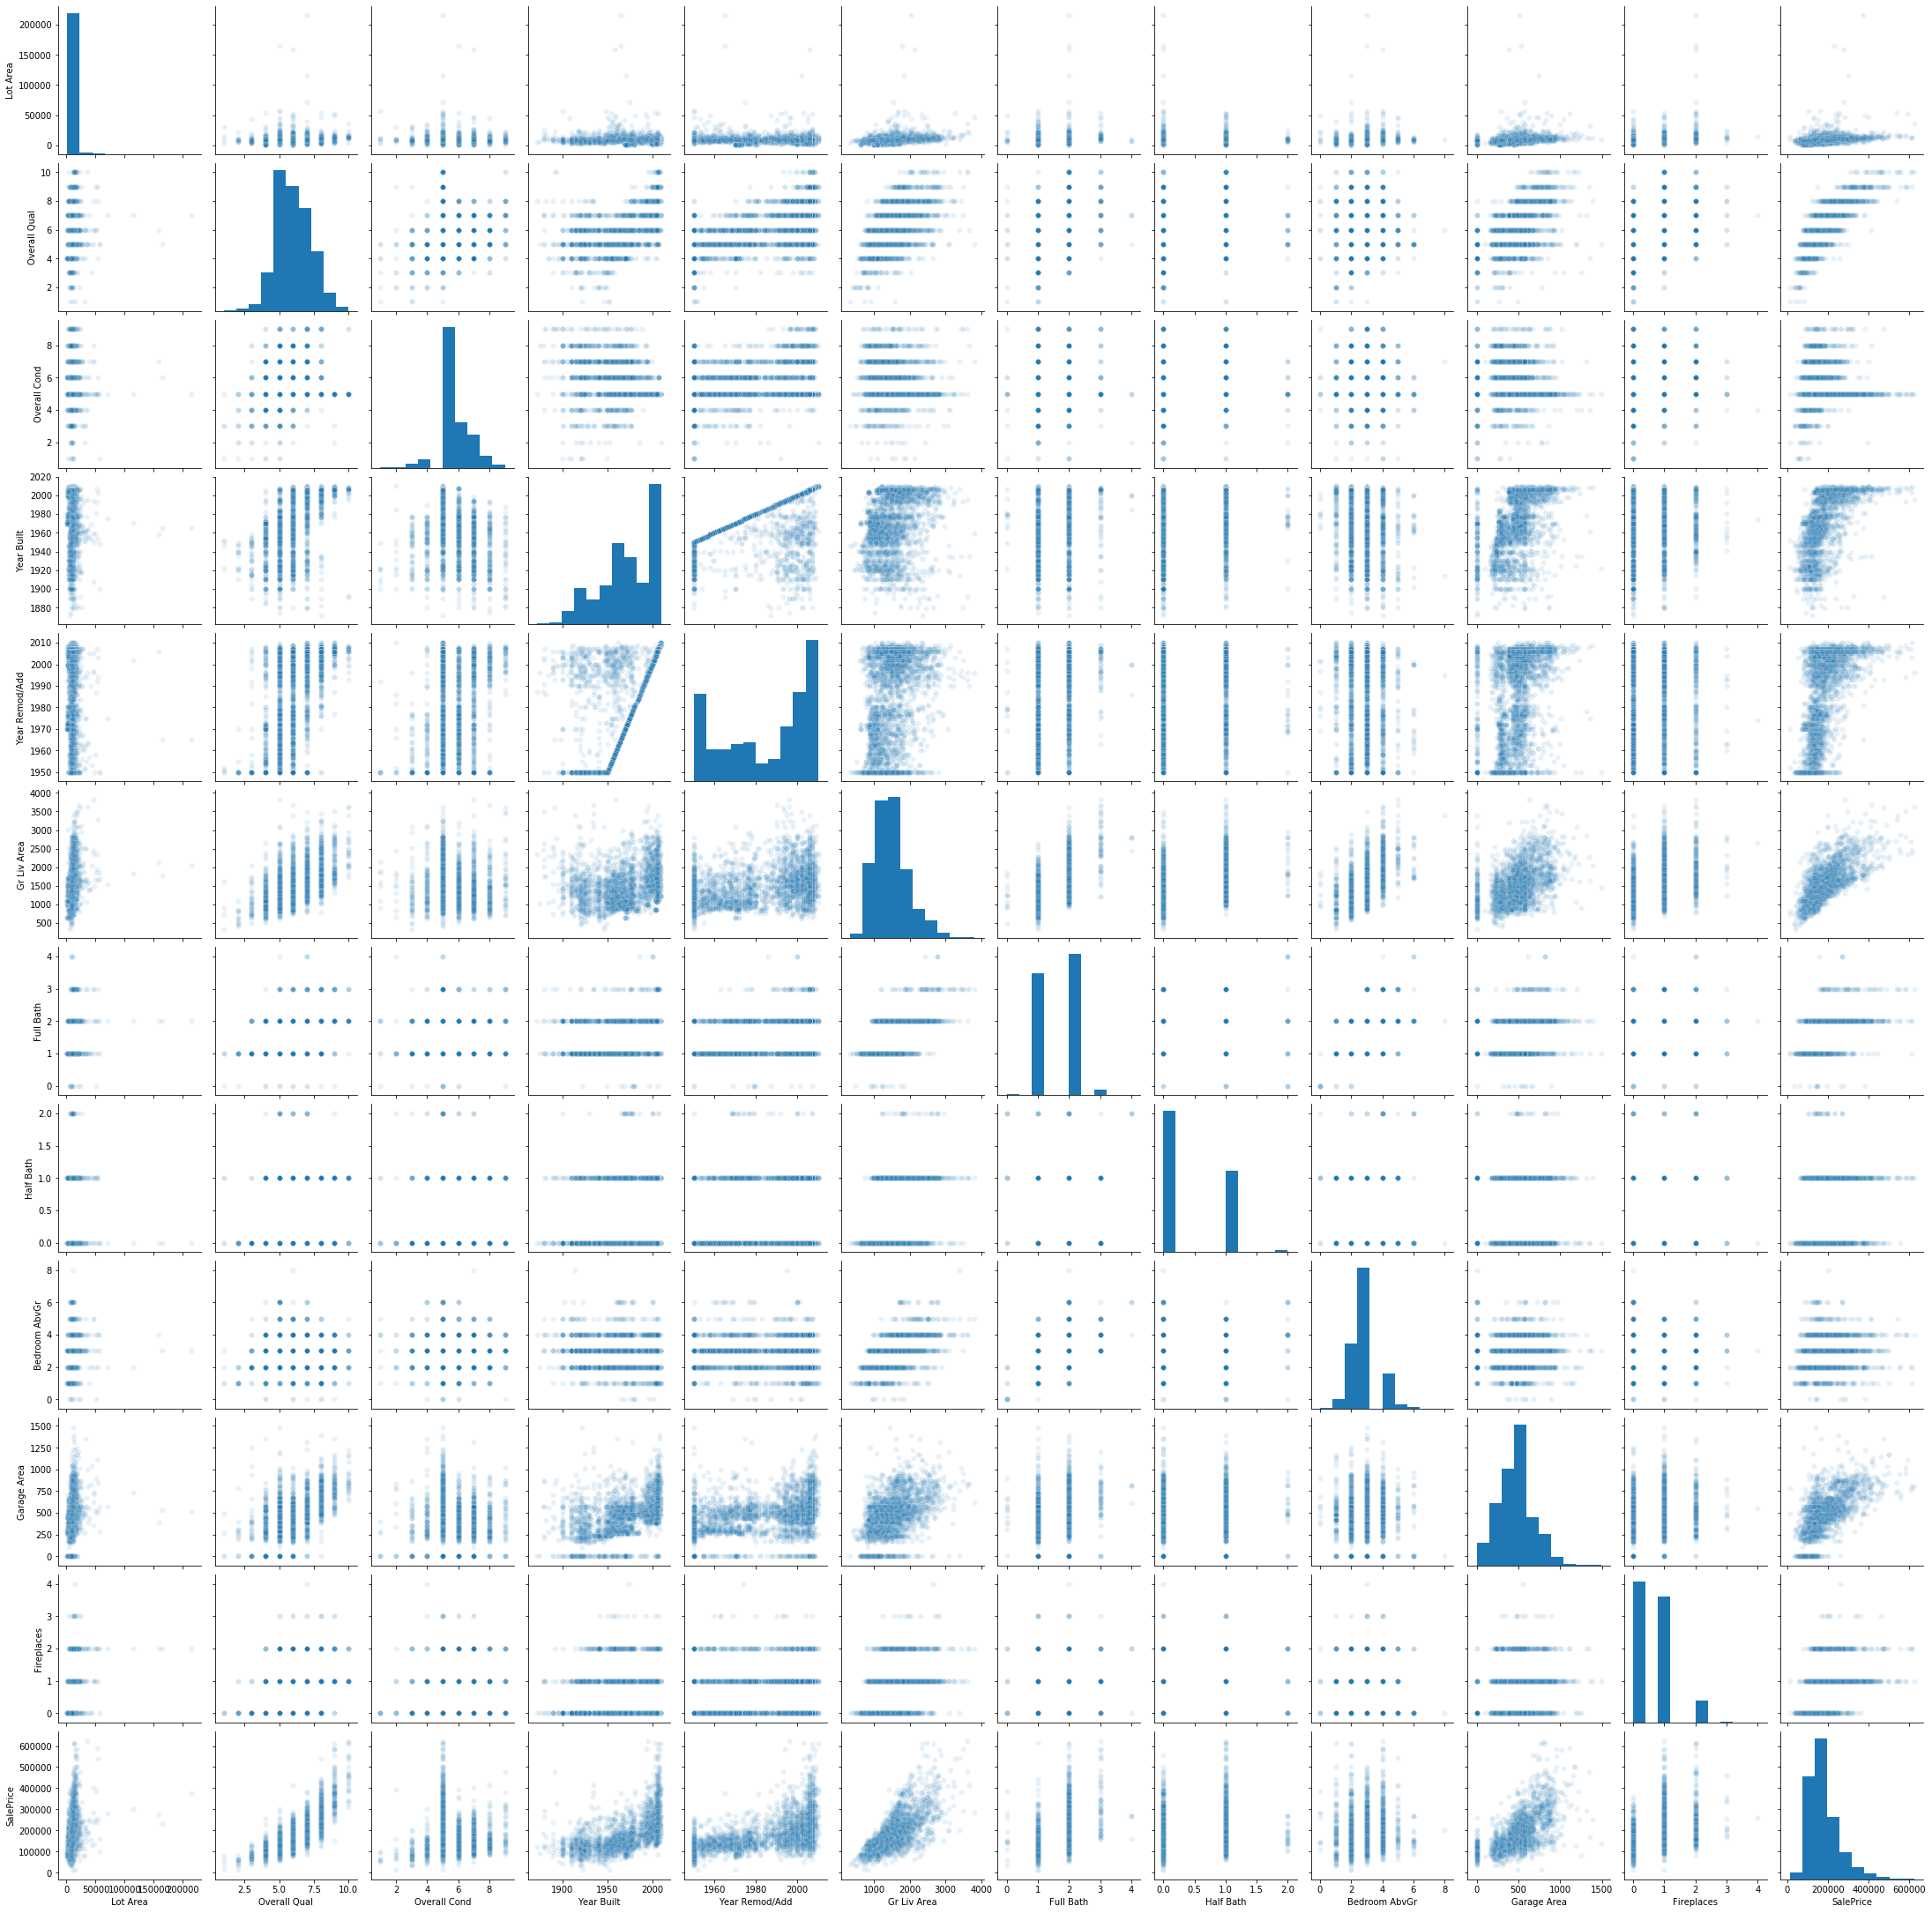

In [11]:
import seaborn as sns
sns.pairplot(df_house.loc[:,feat_1+['SalePrice']], plot_kws={'alpha':.1})

## Exercise
- What variables seem to have the strongest relationship with the SalePrice?
- What is going on with 'Year Built' and 'Year Remod/Add'?

In [12]:
X_train_1 = X_train_full.loc[:, feat_1]
y_train_1 = y_train_full
X_test_1 = X_test.loc[:, feat_1]

In [13]:
## Let's start with a random forest to set a baseline

In [14]:
rf1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [15]:
rf1.fit(X_train_1, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [16]:
preds_rf1 = rf1.predict(X_test_1)

In [17]:
np.sqrt(mean_squared_error(y_test, preds_rf1)), mean_absolute_error(y_test, preds_rf1)

(23226.957474341663, 16183.567151121031)

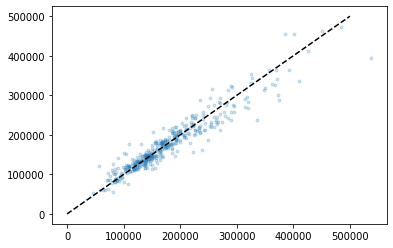

In [18]:
plt.scatter(y_test, preds_rf1, alpha=.2, marker='.')
plt.plot([0,500000],[0,500000], 'k--')

## XGBoost
XGBoost first came out in 2015.  The acronym is "eXtreme Gradient Boosting".  It implemented a number of theoretical and practical improvements, many of which have become standard in subsequent packages:

- *Native handling of missing data*: (Missing values are checked to see if they "fit" better on the left or right side of the tree for each split values)
- *Newton steps*: rather than just finding the gradient, XGBoost also looks at the second derivative to determine the step size.
- *Advanced Regularization*: XGBoost rederived the math to flexibly incorporate *shrinkage* (similar to Lasso/Ridge Regression) and penalize the number of splits.
- *Not checking every split*: XGBoost had a method for deriving quantiles to avoid checking every split (particularly in large datasets when a predictor has a large number of possible values).  Though not the default, this has since been shown to be effective both for speeding up the training *and* as another source of regularization
- *Distributed training*: XGBoost had implementations for working with large datasets that are not held in memory.

In [19]:
## Now let's try a XGBoost model (using early stopping)
## We will just use the test set as our validation set to simplify things

In [20]:
xgb1 = xgb.XGBRegressor(max_depth=2, 
                        n_estimators=1000, learning_rate=.05)
xgb1

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [21]:
xgb1.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10)

[0]	validation_0-rmse:183543.75000
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:175050.26562
[2]	validation_0-rmse:167040.70312
[3]	validation_0-rmse:159326.75000
[4]	validation_0-rmse:152134.45312
[5]	validation_0-rmse:145181.60938
[6]	validation_0-rmse:138700.53125
[7]	validation_0-rmse:132469.09375
[8]	validation_0-rmse:126580.65625
[9]	validation_0-rmse:121000.75781
[10]	validation_0-rmse:115739.21875
[11]	validation_0-rmse:110718.57031
[12]	validation_0-rmse:105999.13281
[13]	validation_0-rmse:101536.32031
[14]	validation_0-rmse:97144.85156
[15]	validation_0-rmse:92935.17188
[16]	validation_0-rmse:89086.48438
[17]	validation_0-rmse:85278.75781
[18]	validation_0-rmse:81841.67188
[19]	validation_0-rmse:78575.23438
[20]	validation_0-rmse:75381.46094
[21]	validation_0-rmse:72551.61719
[22]	validation_0-rmse:69794.98438
[23]	validation_0-rmse:67237.36719
[24]	validation_0-rmse:64763.73438
[25]	validation_0-rmse:62506.87500
[26]	validation_0-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
preds_xgb1 = xgb1.predict(X_test_1)

In [23]:
np.sqrt(mean_squared_error(y_test, preds_xgb1)), mean_absolute_error(y_test, preds_xgb1)

(23047.109749782052, 16401.597724609375)

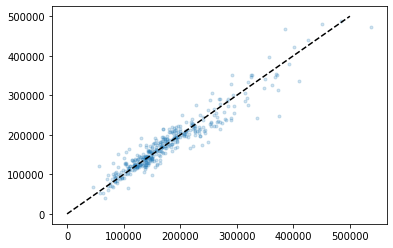

In [24]:
plt.scatter(y_test, preds_xgb1, alpha=.2, marker='.')
plt.plot([0,500000],[0,500000], 'k--')

In [25]:
md_vals_vec=list(range(1,9))
rmse_vec = np.zeros(len(md_vals_vec))
for i,md in enumerate(md_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=md, 
                        n_estimators=10000, learning_rate=.01)
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

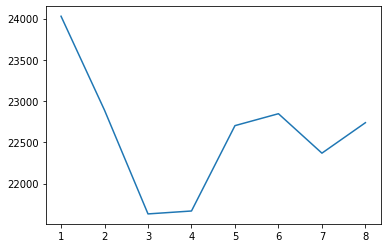

In [26]:
# Plot performance vs. max_depth
plt.plot(md_vals_vec, rmse_vec)

### Other boosting parameters
Thus far we have focused our attention on the `max_depth`, `learning_rate`, and `n_estimators`.  Indeed, these are the most important parameters to get right.  However, there are other parameters that can yield improvements if tuned appropriately.  These parameters fall into several groups, and different packages handle them (and name them) differently.


#### Data (row) sampling parameters
How to choose the data for each tree.  Unlike Random Forest, "Standard" boosting just uses the whole data set for each tree.  However, you can choose to sample the data (with or without replacement) to add regularization.
- subsample, replacement, etc.

#### Feature sampling parameters
Unlike Random Forest, the default in gradient boosting is to check every feature at every node.  Since boosting is not relying on having uncorrelated trees, it can still give good results without this randomization.  However, randomly sampling features can help regularize, in addition to speeding up training (it is faster to train if you don't check every column every time). Some packages permit subsampling features per tree, level, *and* node.
- Examples: colsample_bynode, colsample_bytree, colsample_bylevel

#### Split sampling parameters
For each feature, should we check all possible splits, or reduce the number somehow
- Examples: tree_method, sketch_eps in XGBoost



#### Regularization parameters
Other regularization parameters include:
- minimum "improvement" required to make a split
- "Shrinkage" of the leaf values of the trees (as in LASSO / Ridge regression)
- gamma, reg_lambda, reg_alpha



## Setting Parameters in Gradient Boosting
There are two main approaches to finding the best parameters for your Gradient Boosting Model
1. Do a massive "grid search"
2. Just play around manually

There are drawbacks to both of these:
- Grid search is extremely time consuming
- It is difficult to know if you are choosing appropriate parameters and ranges
- There may be other considerations than just metric performance (model size, coherence, training time)
- Manual approaches are haphazard, attention consuming

## Suggested approach
1. Tune max_depth using the approach above (early stopping, low learning rate)
1. Pick 1 or 2 best max_depth values.
1. Experiment with other parameters to get a sense of how much difference they make
1. Do a "targeted" grid search across a few other parameters (save *all* the results)
1. Analyze the results to choose the best value
1. Not always necessary to do a full *cross-validated* grid search.  Can just use a single test set.

#### Summary: Look around *before* doing full grid search

### Let's try this out...
From the above graph, we see that max_depth of 3 or 4 looks best.

Let's play around with some of the other parameters...

In [27]:
# Look at subsample first
param_vals_vec=[.7,.75,.8,.85,.9,.95,1]
rmse_vec = np.zeros(len(param_vals_vec))
for i,param_val in enumerate(param_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=3, 
                        n_estimators=10000, learning_rate=.01,
                        subsample=param_val)
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

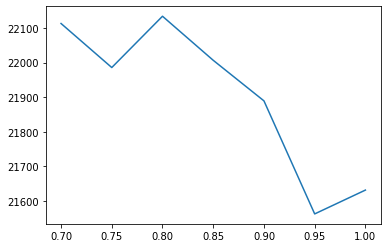

In [28]:
plt.plot(param_vals_vec, rmse_vec)

In [29]:
# Look at subsample first
param_vals_vec=[.7,.75,.8,.85,.9,.95,1]
rmse_vec = np.zeros(len(param_vals_vec))
for i,param_val in enumerate(param_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=4, 
                        n_estimators=10000, learning_rate=.01,
                        subsample=param_val)
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

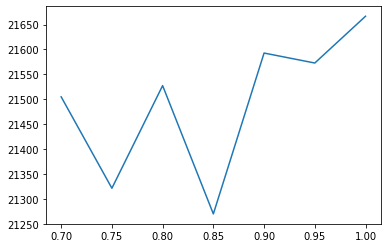

In [30]:
plt.plot(param_vals_vec, rmse_vec)

In [31]:
# Let's set md 4, subsample .85
# and look at the colsample params
param_vals_vec=[.2, .4, .6, .8, 1]
rmse_vec = np.zeros(len(param_vals_vec))
for i,param_val in enumerate(param_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=4, 
                        n_estimators=10000, learning_rate=.01,
                        subsample=.85, colsample_bynode=param_val)
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

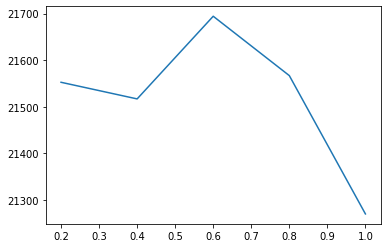

In [32]:
plt.plot(param_vals_vec, rmse_vec)

In [33]:
# Let's set md 4, subsample .85
# now look at the regularization params
param_vals_vec=[1, 2, 3, 5, 10, 20]
rmse_vec = np.zeros(len(param_vals_vec))
for i,param_val in enumerate(param_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=4, 
                        n_estimators=10000, learning_rate=.01,
                        subsample=.85, reg_lambda=param_val)
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

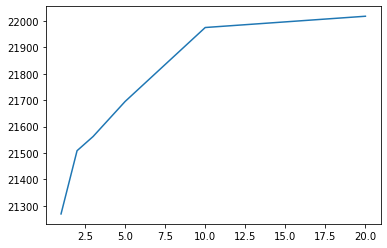

In [34]:
plt.plot(param_vals_vec, rmse_vec)

In [35]:
# Let's set md 4, subsample .85
# now look at the tree_method
param_vals_vec=[.005, .01, .03, .1, .2]
rmse_vec = np.zeros(len(param_vals_vec))
for i,param_val in enumerate(param_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=4, 
                        n_estimators=10000, learning_rate=.01,
                        subsample=.85,
                     tree_method='approx',
                     sketch_eps=param_val
                               )
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

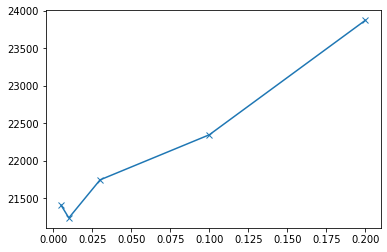

In [36]:
plt.plot(param_vals_vec, rmse_vec, marker='x')

In [37]:
# Let's set md 4, subsample .85
# now look at the tree_method
param_vals_vec=[1,2,3,5,10,20]
rmse_vec = np.zeros(len(param_vals_vec))
for i,param_val in enumerate(param_vals_vec):
    xgb_temp = xgb.XGBRegressor(max_depth=4, 
                        n_estimators=10000, learning_rate=.01,
                        subsample=.85,
                        min_child_weight = param_val)
    xgb_temp.fit(X_train_1, y_train_1, 
         eval_set=[(X_test_1, y_test)], 
        early_stopping_rounds = 10, verbose=0)
    preds = xgb_temp.predict(X_test_1)
    rmse_vec[i] = np.sqrt(mean_squared_error(y_test, preds))

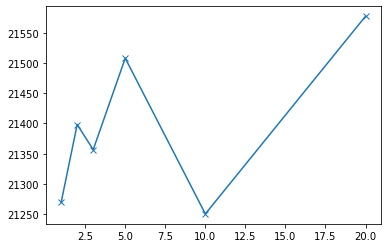

In [38]:
plt.plot(param_vals_vec, rmse_vec, marker='x')

## Exercise: Write your own grid search!
Let's expand the script we wrote previously to search over a grid of parameter values.

Specifically, we want to be able to:
1) Designate a range of values for each parameter (in a dictionary as shown below)
2) Designate the train/test sets to use
3) Use early stopping (on the test set)
4) Output every parameter combination tried, and the corresponding score

I've provided some helper functions and example code to make life easier and give some hints.

When you are done, run your grid search over a (small) example grid (between 20 and 50 combinations) and look at the results.

Then resample the train/test sets and run the grid search again.  Are the results consistent? 


### Extra Credit
Try to make this a reusable function (rather than just a script) where you pass a model, data, parameter ranges and it returns the scores corresponding to each combination.  See how generalizable you can make it (it can be tricky!)

In [39]:
## This function will make a list of parameter combinations from a dictionary of ranges
## See example usage below

def _get_param_settings_from_grid(param_grid):
    num_settings = np.prod([len(i) for i in param_grid.values()])
    pg_tuple = tuple(param_grid.items())
    param_names = [k[0] for k in pg_tuple]
    param_lists = [k[1] for k in pg_tuple]
    param_list_lengths = [len(k) for k in param_lists]
    param_dict_list = []
    for i in range(num_settings):
        indices = _int_to_indices(i,param_list_lengths)
        curr_param_dict = {}
        for k in range(len(param_names)):
            curr_param_dict[param_names[k]]=param_lists[k][indices[k]]
        param_dict_list.append(curr_param_dict)
    return param_dict_list    

def _int_to_indices(j,lengths):
    out_list = []
    for i in range(len(lengths)):
        curr_ind = j % lengths[i]
        out_list.append(curr_ind)
        j = j//lengths[i]
    return(out_list)


In [40]:
pg = {}
pg['subsample'] = [.8, .85, .9, 1]
pg['max_depth'] = [3,4]
pg['colsample_bynode'] = [.5, 1]

In [41]:
param_list = _get_param_settings_from_grid(pg)
param_list

[{'subsample': 0.8, 'max_depth': 3, 'colsample_bynode': 0.5},
 {'subsample': 0.85, 'max_depth': 3, 'colsample_bynode': 0.5},
 {'subsample': 0.9, 'max_depth': 3, 'colsample_bynode': 0.5},
 {'subsample': 1, 'max_depth': 3, 'colsample_bynode': 0.5},
 {'subsample': 0.8, 'max_depth': 4, 'colsample_bynode': 0.5},
 {'subsample': 0.85, 'max_depth': 4, 'colsample_bynode': 0.5},
 {'subsample': 0.9, 'max_depth': 4, 'colsample_bynode': 0.5},
 {'subsample': 1, 'max_depth': 4, 'colsample_bynode': 0.5},
 {'subsample': 0.8, 'max_depth': 3, 'colsample_bynode': 1},
 {'subsample': 0.85, 'max_depth': 3, 'colsample_bynode': 1},
 {'subsample': 0.9, 'max_depth': 3, 'colsample_bynode': 1},
 {'subsample': 1, 'max_depth': 3, 'colsample_bynode': 1},
 {'subsample': 0.8, 'max_depth': 4, 'colsample_bynode': 1},
 {'subsample': 0.85, 'max_depth': 4, 'colsample_bynode': 1},
 {'subsample': 0.9, 'max_depth': 4, 'colsample_bynode': 1},
 {'subsample': 1, 'max_depth': 4, 'colsample_bynode': 1}]

In [42]:
params1 = param_list[13]
params1

{'subsample': 0.85, 'max_depth': 4, 'colsample_bynode': 1}

In [43]:
xgb_temp = xgb.XGBRegressor(n_estimators=10000, learning_rate=.01)
xgb_temp.set_params(**params1)
xgb_temp

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=1, colsample_bytree=None, gamma=None, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=4,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=0.85,
             tree_method=None, validate_parameters=None, verbosity=None)

In [44]:
xgb_temp.fit(X_train_1, y_train_1, 
     eval_set=[(X_test_1, y_test)], 
    early_stopping_rounds = 10, verbose=0)
preds = xgb_temp.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, preds))

21269.597044799524

# Break

## LightGBM
LightGBM came out around 2017 (was in NeurIPS 2017), written mainly by researchers at Microsoft Research.  Its major advances are the following:
- smarter techniques (by default) to avoid searching all splits (ignoring small gradients)
- "looks for" mutually exclusive features to handle them better
- handles categorical variables by ranking their marginal target value in each node
- categorical variables *must* be integer encoded

In [45]:
import lightgbm as lgbm

In [46]:
lgbm.LGBMRegressor?

Init signature:
lgbm.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    **kwargs,
)
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth fo

In [47]:
lgbm1 = lgbm.LGBMRegressor(n_estimators=10000, learning_rate=.01, max_depth=4, subsample=.85)

In [48]:
lgbm1.fit(X_train_1, y_train_1, eval_set=[(X_test_1, y_test)],
                          early_stopping_rounds=10)

[1]	valid_0's l2: 5.42802e+09
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 5.34683e+09
[3]	valid_0's l2: 5.26695e+09
[4]	valid_0's l2: 5.18868e+09
[5]	valid_0's l2: 5.11208e+09
[6]	valid_0's l2: 5.03661e+09
[7]	valid_0's l2: 4.96285e+09
[8]	valid_0's l2: 4.89035e+09
[9]	valid_0's l2: 4.8192e+09
[10]	valid_0's l2: 4.74948e+09
[11]	valid_0's l2: 4.68142e+09
[12]	valid_0's l2: 4.61455e+09
[13]	valid_0's l2: 4.54855e+09
[14]	valid_0's l2: 4.48407e+09
[15]	valid_0's l2: 4.42109e+09
[16]	valid_0's l2: 4.35909e+09
[17]	valid_0's l2: 4.29736e+09
[18]	valid_0's l2: 4.23737e+09
[19]	valid_0's l2: 4.17863e+09
[20]	valid_0's l2: 4.12211e+09
[21]	valid_0's l2: 4.06557e+09
[22]	valid_0's l2: 4.01075e+09
[23]	valid_0's l2: 3.95656e+09
[24]	valid_0's l2: 3.9026e+09
[25]	valid_0's l2: 3.84981e+09
[26]	valid_0's l2: 3.79732e+09
[27]	valid_0's l2: 3.74662e+09
[28]	valid_0's l2: 3.69576e+09
[29]	valid_0's l2: 3.64626e+09
[30]	valid_0's l2: 3.59718e+09
[31]	valid_0's l2: 3

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.85, subsample_for_bin=200000, subsample_freq=0)

In [49]:
lgbm1_preds = lgbm1.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, lgbm1_preds))

21451.78955405113

In [50]:
feat_2 = ['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Gr Liv Area', 
        'Full Bath', 'Half Bath', 'Bedroom AbvGr',
         'Garage Area', 'Fireplaces','Neighborhood']


In [51]:
X_train_2 = X_train_full.loc[:, feat_2]
y_train_2 = y_train_full
X_test_2 = X_test.loc[:, feat_2]

In [52]:
mapping_dict = {neigh_name:i for i,neigh_name in enumerate(df_house.Neighborhood.unique())}
mapping_dict

{'NAmes': 0,
 'Gilbert': 1,
 'StoneBr': 2,
 'NWAmes': 3,
 'Somerst': 4,
 'BrDale': 5,
 'NPkVill': 6,
 'NridgHt': 7,
 'Blmngtn': 8,
 'NoRidge': 9,
 'SawyerW': 10,
 'Sawyer': 11,
 'Greens': 12,
 'BrkSide': 13,
 'OldTown': 14,
 'IDOTRR': 15,
 'ClearCr': 16,
 'SWISU': 17,
 'Edwards': 18,
 'CollgCr': 19,
 'Crawfor': 20,
 'Blueste': 21,
 'Mitchel': 22,
 'Timber': 23,
 'MeadowV': 24,
 'Veenker': 25,
 'GrnHill': 26,
 'Landmrk': 27}

In [53]:
X_train_2a = X_train_2.copy()
X_test_2a = X_test_2.copy()

X_train_2a['Neighborhood'] = X_train_2['Neighborhood'].map(lambda x: mapping_dict[x])
X_test_2a['Neighborhood'] = X_test_2['Neighborhood'].map(lambda x: mapping_dict[x])


In [54]:
# try md4 then md3
lgbm2 = lgbm.LGBMRegressor(n_estimators=10000, learning_rate=.01, max_depth=4, subsample=.85, 
                           categorical_feature='name:Neighborhood',
                          num_leaves = 64)

In [55]:
lgbm2.fit(X_train_2a, y_train_2, eval_set=[(X_test_2a, y_test)], categorical_feature=['Neighborhood'],
         early_stopping_rounds=10)

/Users/brianlucena/.pyenv/versions/3.7.3/envs/mypy373/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/brianlucena/.pyenv/versions/3.7.3/envs/mypy373/lib/python3.7/site-packages/lightgbm/basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Neighborhood']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/Users/brianlucena/.pyenv/versions/3.7.3/envs/mypy373/lib/python3.7/site-packages/lightgbm/basic.py:1077: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/brianlucena/.pyenv/versions/3.7.3/envs/mypy373/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('{} in param d

[1]	valid_0's l2: 5.42699e+09
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 5.344e+09
[3]	valid_0's l2: 5.26319e+09
[4]	valid_0's l2: 5.18325e+09
[5]	valid_0's l2: 5.10559e+09
[6]	valid_0's l2: 5.0294e+09
[7]	valid_0's l2: 4.95419e+09
[8]	valid_0's l2: 4.88098e+09
[9]	valid_0's l2: 4.80806e+09
[10]	valid_0's l2: 4.73633e+09
[11]	valid_0's l2: 4.66693e+09
[12]	valid_0's l2: 4.59794e+09
[13]	valid_0's l2: 4.53106e+09
[14]	valid_0's l2: 4.46539e+09
[15]	valid_0's l2: 4.40212e+09
[16]	valid_0's l2: 4.33831e+09
[17]	valid_0's l2: 4.27724e+09
[18]	valid_0's l2: 4.2164e+09
[19]	valid_0's l2: 4.15602e+09
[20]	valid_0's l2: 4.09872e+09
[21]	valid_0's l2: 4.04097e+09
[22]	valid_0's l2: 3.98509e+09
[23]	valid_0's l2: 3.92915e+09
[24]	valid_0's l2: 3.87516e+09
[25]	valid_0's l2: 3.82179e+09
[26]	valid_0's l2: 3.76936e+09
[27]	valid_0's l2: 3.7184e+09
[28]	valid_0's l2: 3.66596e+09
[29]	valid_0's l2: 3.61588e+09
[30]	valid_0's l2: 3.56518e+09
[31]	valid_0's l2: 3.51

LGBMRegressor(boosting_type='gbdt', categorical_feature='name:Neighborhood',
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.01, max_depth=4, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
              n_jobs=-1, num_leaves=64, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.85,
              subsample_for_bin=200000, subsample_freq=0)

In [56]:
lgbm2_preds = lgbm2.predict(X_test_2a)
np.sqrt(mean_squared_error(y_test, lgbm2_preds))

21363.8962796525

## Catboost
Catboost came out around 2017-2018 (paper in NeurIPS 2018), written by a group of researchers at Yandex.  Its major advance was allowing *native handling of categorical variables* (as strings).  Specifically, it does on-the-fly *numerical encoding* of categorical variables, with a clever encoding scheme to reduce overfitting (their paper argues that the standard approach of LightGBM overfits).  It is also highly optimized, very fast.

In [57]:
import catboost as cb

In [58]:
cb1 = cb.CatBoostRegressor(n_estimators=10000, learning_rate=.01, max_depth=4,
                          early_stopping_rounds=10, eval_metric='RMSE', subsample=.85)

In [59]:
cb1.fit(X_train_1, y_train_1, eval_set=[(X_test_1, y_test)])

0:	learn: 78673.5672241	test: 73770.7736529	best: 73770.7736529 (0)	total: 55.1ms	remaining: 9m 10s
1:	learn: 78116.4190710	test: 73283.1910098	best: 73283.1910098 (1)	total: 59.6ms	remaining: 4m 58s
2:	learn: 77613.3151732	test: 72838.1760004	best: 72838.1760004 (2)	total: 64.8ms	remaining: 3m 35s
3:	learn: 77146.8460866	test: 72412.7692275	best: 72412.7692275 (3)	total: 69.4ms	remaining: 2m 53s
4:	learn: 76612.0544106	test: 71918.4061911	best: 71918.4061911 (4)	total: 73.7ms	remaining: 2m 27s
5:	learn: 76123.3155100	test: 71462.2589191	best: 71462.2589191 (5)	total: 77.5ms	remaining: 2m 9s
6:	learn: 75630.6081149	test: 71015.1854312	best: 71015.1854312 (6)	total: 80.8ms	remaining: 1m 55s
7:	learn: 75141.5519180	test: 70591.9787521	best: 70591.9787521 (7)	total: 84.3ms	remaining: 1m 45s
8:	learn: 74652.0339559	test: 70132.8546662	best: 70132.8546662 (8)	total: 87.6ms	remaining: 1m 37s
9:	learn: 74183.9445491	test: 69702.1462130	best: 69702.1462130 (9)	total: 91.2ms	remaining: 1m 31s
1

In [60]:
cb1_preds = cb1.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, cb1_preds))

22000.001778396

In [61]:
## Try md 4 then md 6
cb2 = cb.CatBoostRegressor(n_estimators=10000, learning_rate=.01, max_depth=6,
                          early_stopping_rounds=10, eval_metric='RMSE', cat_features=['Neighborhood'])

In [62]:
cb2.fit(X_train_2, y_train_2, eval_set=[(X_test_2, y_test)])

0:	learn: 78647.4688462	test: 73713.6644304	best: 73713.6644304 (0)	total: 6.56ms	remaining: 1m 5s
1:	learn: 78095.4101049	test: 73218.2399308	best: 73218.2399308 (1)	total: 13.1ms	remaining: 1m 5s
2:	learn: 77550.2423379	test: 72736.3805273	best: 72736.3805273 (2)	total: 20.1ms	remaining: 1m 6s
3:	learn: 77030.2915315	test: 72235.8929472	best: 72235.8929472 (3)	total: 26.4ms	remaining: 1m 5s
4:	learn: 76495.7279610	test: 71752.5670209	best: 71752.5670209 (4)	total: 33.2ms	remaining: 1m 6s
5:	learn: 75970.0129172	test: 71285.3964287	best: 71285.3964287 (5)	total: 39.4ms	remaining: 1m 5s
6:	learn: 75459.1545939	test: 70814.0910597	best: 70814.0910597 (6)	total: 45.6ms	remaining: 1m 5s
7:	learn: 74951.1823531	test: 70326.7921172	best: 70326.7921172 (7)	total: 52ms	remaining: 1m 4s
8:	learn: 74446.9122900	test: 69894.8727751	best: 69894.8727751 (8)	total: 57.3ms	remaining: 1m 3s
9:	learn: 73928.0839227	test: 69433.2450458	best: 69433.2450458 (9)	total: 62.5ms	remaining: 1m 2s
10:	learn: 7

In [63]:
cb2_preds = cb2.predict(X_test_2)
np.sqrt(mean_squared_error(y_test, cb2_preds))

20863.87110946742

### StructureBoost
StructureBoost was released in 2020 (I am the author).  It is based on work I published in AISTATS 2020.  The major advance is the ability to exploit known structure in a categorical variable.

For example, in this problem, if we knew the locations of the neighborhoods (which neighborhoods border which others) we could pass that to the algorithm, and it could make splits based on that.

StructureBoost relies on a *feature configuration dictionary* to configure several parameters at a feature specific level.

We will only touch on StructureBoost today -- there are many available resources:

YouTube videos:

Categorical Structure:
- https://www.youtube.com/watch?v=u0Wlofm60rA

Intro to StructureBoost
- https://www.youtube.com/watch?v=81h098kJPCQ&t=1s

Notebooks:
In this github repo:
ODSC_West_2020/StructureBoost_Workshop.ipynb

In [64]:
import structureboost as stb

In [65]:
# This is a quick way to get a starting configuration that can be modified
fc = stb.get_basic_config(X_train_1, stb.default_config_dict())
fc

{'Lot Area': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Overall Qual': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Overall Cond': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Year Built': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Year Remod/Add': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Gr Liv Area': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Full Bath': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Half Bath': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Bedroom AbvGr': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Garage Area': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Fireplaces': {'feature_type': 'numerical', 'max_splits_to_search': 25}}

In [66]:
stb1 = stb.StructureBoost(max_depth=4, feature_configs=fc, num_trees=10000, learning_rate=.01, mode='regression' )

In [67]:
stb1.fit(X_train_1, y_train_1, eval_set = (X_test_1, y_test), eval_freq=10, early_stop_past_steps=1)

i=0, eval_set_mse = 5511048427.211516
i=10, eval_set_mse = 4743702445.6095495
i=20, eval_set_mse = 4102593354.693519
i=30, eval_set_mse = 3563977047.062269
i=40, eval_set_mse = 3118865209.3642926
i=50, eval_set_mse = 2745534710.882133
i=60, eval_set_mse = 2437414278.0444655
i=70, eval_set_mse = 2167973166.7100067
i=80, eval_set_mse = 1941858965.4270165
i=90, eval_set_mse = 1754862745.199951
i=100, eval_set_mse = 1591144419.817714
i=110, eval_set_mse = 1450392871.3731158
i=120, eval_set_mse = 1329569444.3313816
i=130, eval_set_mse = 1220545309.0947793
i=140, eval_set_mse = 1130212395.4016378
i=150, eval_set_mse = 1048764260.2540332
i=160, eval_set_mse = 976612303.5134301
i=170, eval_set_mse = 919748267.770916
i=180, eval_set_mse = 870754192.7910738
i=190, eval_set_mse = 826342044.3546087
i=200, eval_set_mse = 788504439.4868661
i=210, eval_set_mse = 754937096.1784463
i=220, eval_set_mse = 725583028.4515915
i=230, eval_set_mse = 698946184.2247577
i=240, eval_set_mse = 673965479.8102797
i=

In [68]:
stb1_preds = stb1.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, stb1_preds))

21553.039637841794

In [69]:
# This is a quick way to get a starting configuration that can be modified
fc_def = stb.get_basic_config(X_train_2, stb.default_config_dict())
fc_def

{'Lot Area': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Overall Qual': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Overall Cond': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Year Built': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Gr Liv Area': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Full Bath': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Half Bath': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Bedroom AbvGr': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Garage Area': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Fireplaces': {'feature_type': 'numerical', 'max_splits_to_search': 25},
 'Neighborhood': {'feature_type': 'categorical_str',
  'graph': <graphs.graph_undirected at 0x14ab1f4a8>,
  'split_method': 'span_tree',
  'num_span_trees': 1}}

In [70]:
stb_def = stb.StructureBoost(max_depth=5, feature_configs=fc_def, num_trees=10000, learning_rate=.01, mode='regression' )

In [71]:
stb_def.fit(X_train_2, y_train_2, eval_set = (X_test_2, y_test), eval_freq=10, early_stop_past_steps=1)

i=0, eval_set_mse = 5511048427.211516
i=10, eval_set_mse = 4711465457.666861
i=20, eval_set_mse = 4050290292.6653113
i=30, eval_set_mse = 3510613984.807937
i=40, eval_set_mse = 3057949481.864125
i=50, eval_set_mse = 2674083565.8958063
i=60, eval_set_mse = 2359089160.816676
i=70, eval_set_mse = 2087671525.8641717
i=80, eval_set_mse = 1860046255.0859215
i=90, eval_set_mse = 1666767385.3500488
i=100, eval_set_mse = 1504976757.3895807
i=110, eval_set_mse = 1365224248.6663308
i=120, eval_set_mse = 1251104348.986874
i=130, eval_set_mse = 1148908597.4723144
i=140, eval_set_mse = 1064674223.5398498
i=150, eval_set_mse = 988748929.7815567
i=160, eval_set_mse = 923891491.3981732
i=170, eval_set_mse = 867754934.0622952
i=180, eval_set_mse = 818636690.3123249
i=190, eval_set_mse = 775972158.3117524
i=200, eval_set_mse = 735452705.3382831
i=210, eval_set_mse = 701722922.3612503
i=220, eval_set_mse = 670708177.3594648
i=230, eval_set_mse = 645246530.3445419
i=240, eval_set_mse = 625421239.8171713
i=

In [72]:
stb_def_preds = stb_def.predict(X_test_2)
np.sqrt(mean_squared_error(y_test, stb_def_preds))

20730.927647052613